# Linear Regression Bike Sharing Assignment

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. <br>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. <br>

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Business Objective
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Data Dictionary
- `instant`: record index
- `dteday` : date
- `season` : season (1:spring, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2018, 1:2019)
- `mnth` : month ( 1 to 12)
- `holiday` : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : temperature in Celsius
- `atemp`: feeling temperature in Celsius
- `hum`: humidity
- `windspeed`: wind speed
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

# Step 1: Understanding the dataset

### Importing libraries

In [1020]:
# Import the required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1021]:
# As the dataset is big, jupyternotebook tends to display a shorter version with less columns/rows.
# This is hindering the ability to see the data at a glance. 

# Hence Lets display max rows available in a dataframe
pd.set_option('display.max_rows', None)

# Display max columns available in a dataframe
pd.set_option('display.max_column', None)

# Display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# Display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

# Expand the output display to see more columns
pd.set_option('expand_frame_repr', True)

## Understanding the data

#### As per the data dictionary and problem statement, we need to model the demand for the bikes. Hence the target variable is `cnt`
Let us load the dataset and look at the dataset closely

In [1022]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1023]:
day.shape

(730, 16)

##### The dataset has 730 rows and 16 columns

In [1024]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1025]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### The dataset does not have any null values

# Step 2: Standardising Data

#### As per the data dictionary, following columns appear to be categorical (nominal)
1. `season`
2. `yr`
3. `weathersit`
4. `mnth`
5. `weekday`

Let us map them with appropriate values as mentioned in the data dictionary

##### `season`
Let us replace values in `season` with the values mentioned in data dictionary.
- 1: spring
- 2: summer
- 3: fall
- 4: winter

In [1026]:
def GetSeason(num):
    if num==1:
        return 'spring'
    elif num == 2:
        return 'summer'
    elif num == 3:
        return 'fall'
    elif num == 4:
        return 'winter'

day.season = day.season.apply(GetSeason)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1027]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1028]:
day.season.describe()

count      730
unique       4
top       fall
freq       188
Name: season, dtype: object

#### `yr`
Let us replace values in `yr` with the values mentioned in data dictionary.
- 0: 2018
- 1: 2019

In [1029]:
def GetYear(num):
    if num == 0:
        return 2018
    elif num == 1:
        return 2019

day.yr = day.yr.apply(GetYear)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### `weathersit`
`weathersit` has following values mentioned in data dictionary.
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


To simplify, Lets rename them as:
- 1: Clear_PartlyCloudy
- 2: Misty_Cloudy
- 3: Light_Rain_Snow
- 4: Heavy_Rain_Snow

In [1030]:
def GetWeatherSituation(num):
    if num == 1:
        return 'Clear_PartlyCloudy'
    elif num == 2:
        return 'Misty_Cloudy'
    elif num == 3:
        return 'Light_Rain_Snow'
    elif num == 4:
        return 'Heavy_Rain_Snow'

day.weathersit = day.weathersit.apply(GetWeatherSituation)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### `mnth`
`mnth` contains values 1-12 that describe the month. Lets convert them to string values of the month

In [1031]:
def GetMonth(num):
    if num == 1:
        return 'Jan'
    elif num == 2:
        return 'Feb'
    elif num == 3:
        return 'Mar'
    elif num == 4:
        return 'Apr'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'Jun'
    elif num == 7:
        return 'Jul'
    elif num == 8:
        return 'Aug'
    elif num == 9:
        return 'Sep'
    elif num == 10:
        return 'Oct'
    elif num == 11:
        return 'Nov'
    elif num == 12:
        return 'Dec'

day.mnth = day.mnth.apply(GetMonth)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,6,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,0,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,1,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,2,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,3,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### `weekday`
`weekday` contains values 0-6 that describe the day of the week. Lets convert them to string values of the day. <br/>

Instead of assuming **0 to 6** as **Mon to Sun**, let us check the calendar dates for first two values.<br/>
As per the **Georgian calendar**, 01-01-2018 was **Monday**. In the dataset, **01-01-2018 is marked as weekday `6`**. While **02-01-2018 is marked as weekday `0`**.<br/>

Hence, as per the actual calendar we get the values for the days as.
- 0: Tuesday
- 1: Wednesday
- 2: Thursday
- 3: Friday
- 4: Saturday
- 5: Sunday
- 6: Monday


If we combine columns workingday and weekday in the dataset, we can see that **Mon and Tue** are not working days.

In [1032]:
def GetWeekday(num):
    if num == 0:
        return 'Tue'
    elif num == 1:
        return 'Wed'
    elif num == 2:
        return 'Thu'
    elif num == 3:
        return 'Fri'
    elif num == 4:
        return 'Sat'
    elif num == 5:
        return 'Sun'
    elif num == 6:
        return 'Mon'

day.weekday = day.weekday.apply(GetWeekday)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Mon,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Tue,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Wed,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Thu,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Fri,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Cleaning

`instant` is the record index. This is not necessary for the analysis. We already have an inbuilt index for the dataset. Lets drop this column

In [1033]:
day = day.drop('instant', axis=1)
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,2018,Jan,0,Mon,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,2018,Jan,0,Tue,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,2018,Jan,0,Wed,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,2018,Jan,0,Thu,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,2018,Jan,0,Fri,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


The target variable is `cnt` which is the total number of users (casual + registered). Lets remove the `casual`  and `registered` columns as they are strongly correlated with our target variable.

In [1034]:
day = day.drop(['casual', 'registered'], axis=1)
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,Jan,0,Mon,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,Jan,0,Tue,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,Jan,0,Wed,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,Jan,0,Thu,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,Jan,0,Fri,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600


`dteday` is the date for which the record was observed on. Date does not influence the total count of users of the bikes. There might be prominent dates like "Christmas" which might affect the usage, but those are already captured as holiday in another column.
Let's drop this column

In [1035]:
day = day.drop('dteday', axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thu,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600


In [1036]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1037]:
day.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Step 3: Data Visualisation

### PairPlots

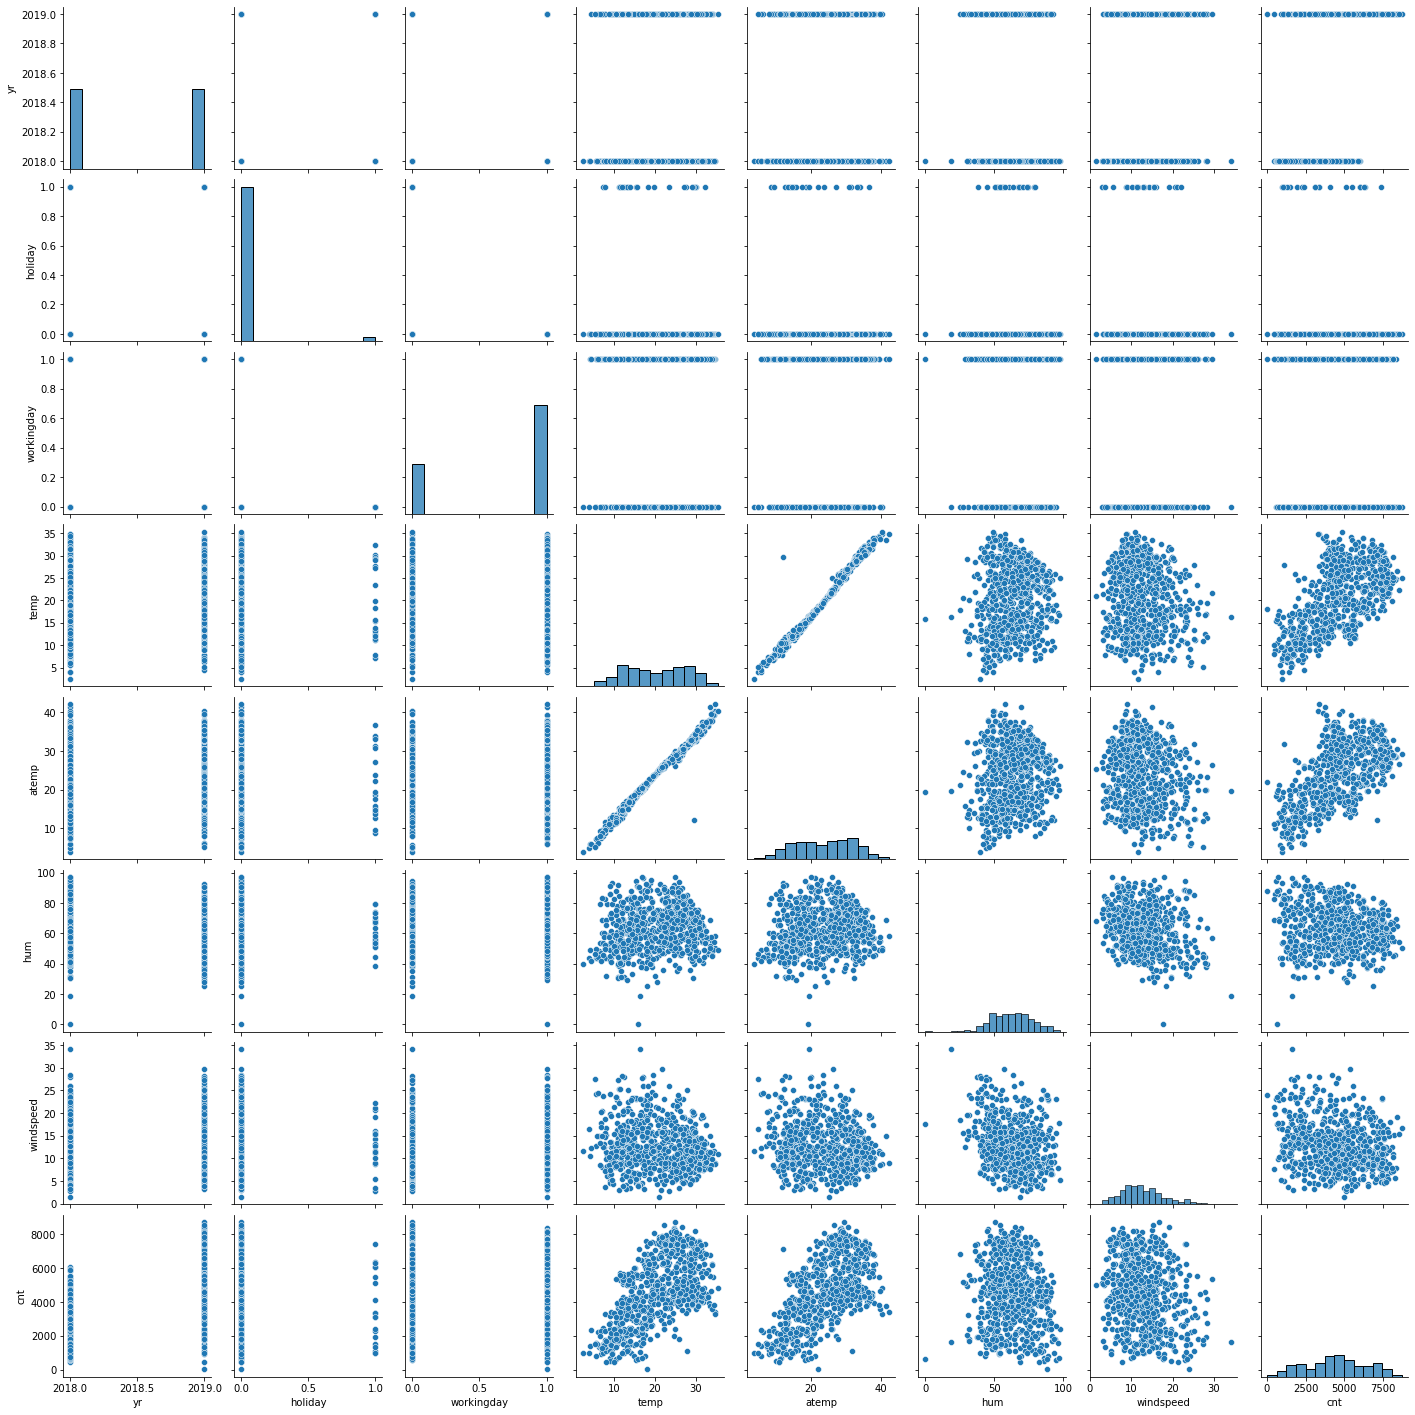

In [1038]:
sns.pairplot(day)

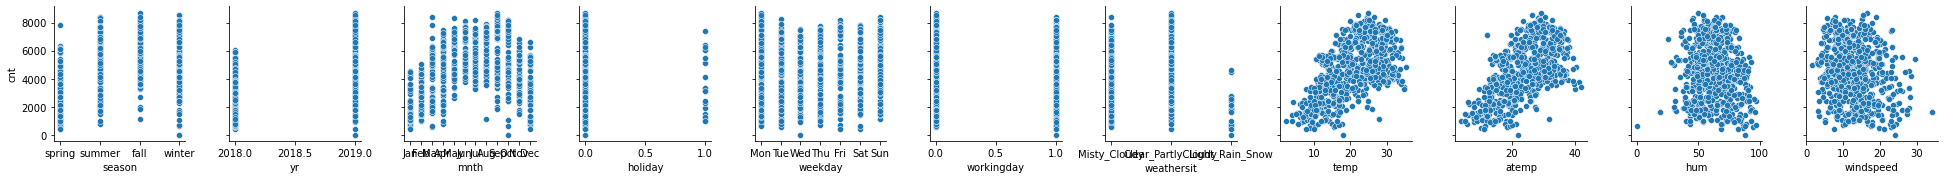

In [1039]:
sns.pairplot(data=day, x_vars=[	"season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"], y_vars="cnt")

Columns temp and atemp look correlated. We will confirm this using a heatmap.

### Box Plots

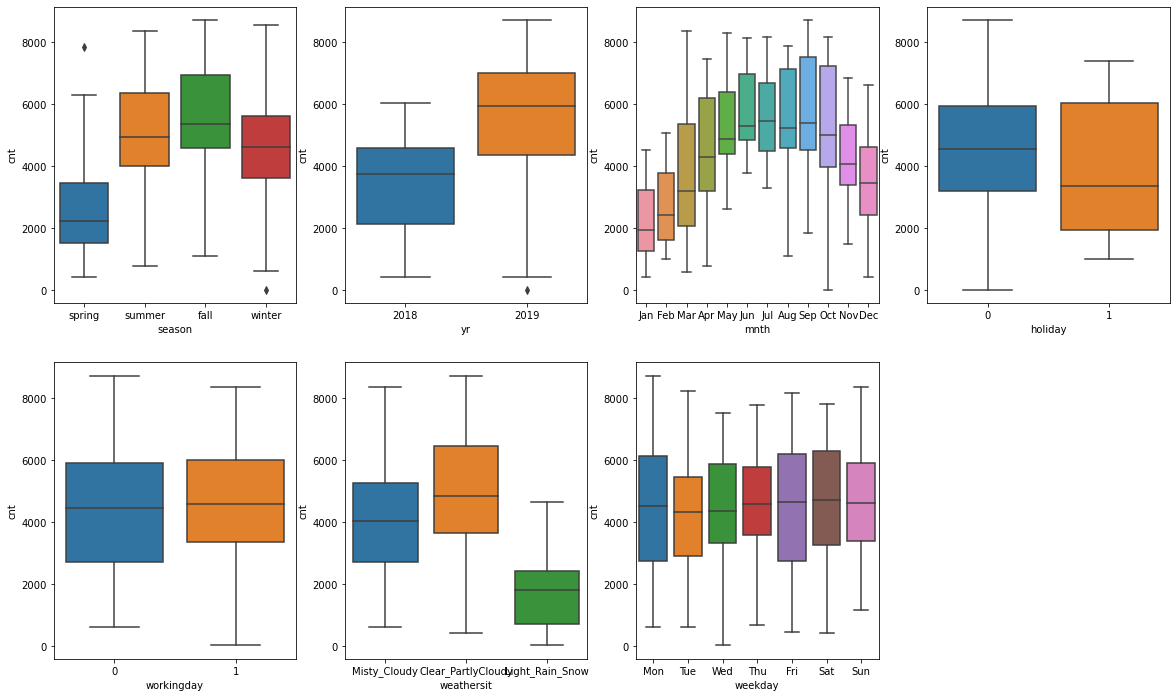

In [1040]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)

plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)

plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)

plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)

plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)

plt.show()

What does this data mean?
1. Fall and Summer are the seasons, which encourage users to take the bike. However the season of winter and spring have less no of users using the bike sharing service
2. The total number of bike rentals increased significantly in 2019 from 2018.
3. Bike rentals are higher during the months from May to Oct. The rentals increase from the start of the year, however the rentals have a sharp drop after october
4. During holidays the median of number of rentals decreases.
5. The median of bike rentals does not differ much if the day is working or not. 
6. Dataset does not contain any data for the weather situation "Heavy_Rain_Snow". Number of rentals are higher when the sky is clear or partly cloudy, however they drop as the weather becomes cloudy or it starts light showers or snow.

### Heatmap

[]

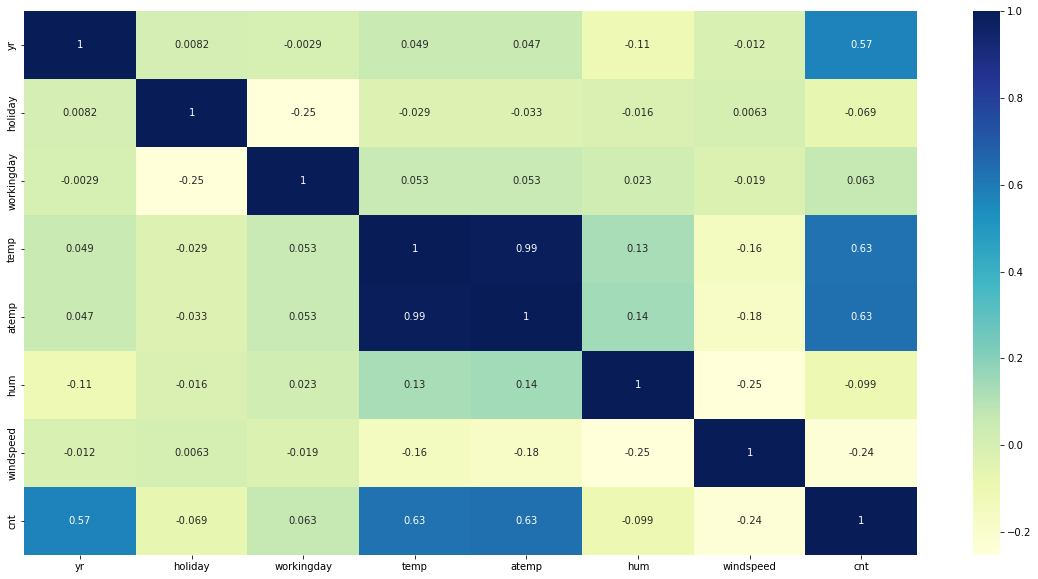

In [1041]:
correlation = day.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.plot()

We can see there is high correlation between `temp` and `atemp` columns.

# Step 4: Data Preparation


### Multicollinearity
From the Visualisation step, we can see that Temperature (`temp`) and Apparant Temperature (`atemp`) are highly correlated. <br/>
To avoid multicollinearity, let us drop one of the columns. <br/>
Lets drop `atemp` column.

In [1042]:
day = day.drop('atemp', axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,0,Misty_Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,0,Misty_Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear_PartlyCloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thu,1,Clear_PartlyCloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear_PartlyCloudy,9.305237,43.6957,12.522300,1600


Let us look at the dataset again.

In [1043]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,0,Misty_Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,0,Misty_Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear_PartlyCloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thu,1,Clear_PartlyCloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear_PartlyCloudy,9.305237,43.6957,12.522300,1600


We substituted actual year values in `yr` and then visualised it. But for model training we will convert them back.<br>
Let us reverse the changes that we made for `yr`.
- `0`: 2018
- `1`: 2019

In [1044]:
def RestoreYear(num):
    if num == 2018:
        return 0
    elif num == 2019:
        return 1
    
day.yr = day.yr.apply(RestoreYear)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Misty_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Misty_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear_PartlyCloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear_PartlyCloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear_PartlyCloudy,9.305237,43.6957,12.522300,1600


### Dummy Variables

In [1045]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Misty_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Misty_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear_PartlyCloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear_PartlyCloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear_PartlyCloudy,9.305237,43.6957,12.522300,1600


##### `season`

In [1046]:
# Get dummy variables for the feature `season`
seasonfeatures = pd.get_dummies(day.season)

In [1047]:
seasonfeatures.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


We do not need 4 columns for the feature `season`. Hence we can drop the column `fall`.<br/>
The seasons will be identified as:
- `000`: fall 
- `001`: winter
- `010`: summer
- `100`: spring

In [1048]:
seasonfeatures = pd.get_dummies(day.season, drop_first=True)
seasonfeatures.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


##### `weathersit`

In [1049]:
# Get dummy variables for the feature `weathersit`
weatherfeatures = pd.get_dummies(day.weathersit)
weatherfeatures.head()

,Clear_PartlyCloudy,Light_Rain_Snow,Misty_Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


According to the data dictionary, there are 4 features for the `weathersit` column. But in the actual dataset we only have 3 features. <br/>
Let us not `drop_first` for this column as we did earlier. As we are comfortable identifying all the features with 3 columns.

- `000`: Heavy_Rain_Snow
- `001`: Misty_Cloudy
- `010`: Light_Rain_Snow
- `100`: Clear_PartlyCloudy


##### `mnth`

In [1050]:
day.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

There are 12 values for each month. Let us get dummy variables for it.

In [1051]:
# Get dummy variables for the feature `mnth`

mnthfeatures = pd.get_dummies(day.mnth, drop_first=True)
mnthfeatures.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


##### `weekday`

In [1052]:
day.weekday.value_counts()

Mon    105
Tue    105
Wed    105
Thu    104
Sat    104
Sun    104
Fri    103
Name: weekday, dtype: int64

There are 7 values for each day. Let us get dummy variables for it.

In [1053]:
# Get dummy variables for the feature `weekday`

weekdayfeatures = pd.get_dummies(day.weekday, drop_first=True)
weekdayfeatures.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


#### Adding the dummy variables for features to the original dataset

In [1054]:
# Let us add the new dummy variables to our dataset
day = pd.concat([day, seasonfeatures, weatherfeatures, mnthfeatures, weekdayfeatures], axis=1)

In [1055]:
# Let us see how the dataset looks like
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Clear_PartlyCloudy,Light_Rain_Snow,Misty_Cloudy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Mon,0,Misty_Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,0,Misty_Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,Clear_PartlyCloudy,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,1,Clear_PartlyCloudy,8.200000,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear_PartlyCloudy,9.305237,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


We do not need the original columns for weather and season.
Let us drop them.

In [1056]:
day.drop(['season', 'weathersit', 'mnth', 'weekday'], axis=1, inplace=True)
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Clear_PartlyCloudy,Light_Rain_Snow,Misty_Cloudy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Step 5: Splitting the Data into Training and Testing Sets

In [1057]:
day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1058]:
print(day_train.shape)
print(day_test.shape)

(510, 30)
(219, 30)


We can see that <br/>
Training dataset `day_train` has 510 rows and 29 columns<br/>
while, Test dataset `day_test` has 219 rows and 29 columns

# Step 6: Rescaling the features


### Min-Max scaling (Normalisation)
To have comparable uniform scales, we will rescale the data so that all the features are within the range [0,1]

In [1059]:
# Instantiate a MinMaxScalar object
scaler = MinMaxScaler()

The columns that are ordinal, we will apply normalisation.

Note: We will not normalize yes-no and dummy variables

In [1060]:
# Create a list of numeric variables
vars = ["temp", "hum", "windspeed", "cnt"]

# Fit the data on scale
day_train[vars] = scaler.fit_transform(day_train[vars])

In [1061]:
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Clear_PartlyCloudy,Light_Rain_Snow,Misty_Cloudy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1062]:
day_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Clear_PartlyCloudy,Light_Rain_Snow,Misty_Cloudy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.627451,0.029412,0.343137,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.483958,0.169124,0.475223,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let us check correlation between all the columns again.

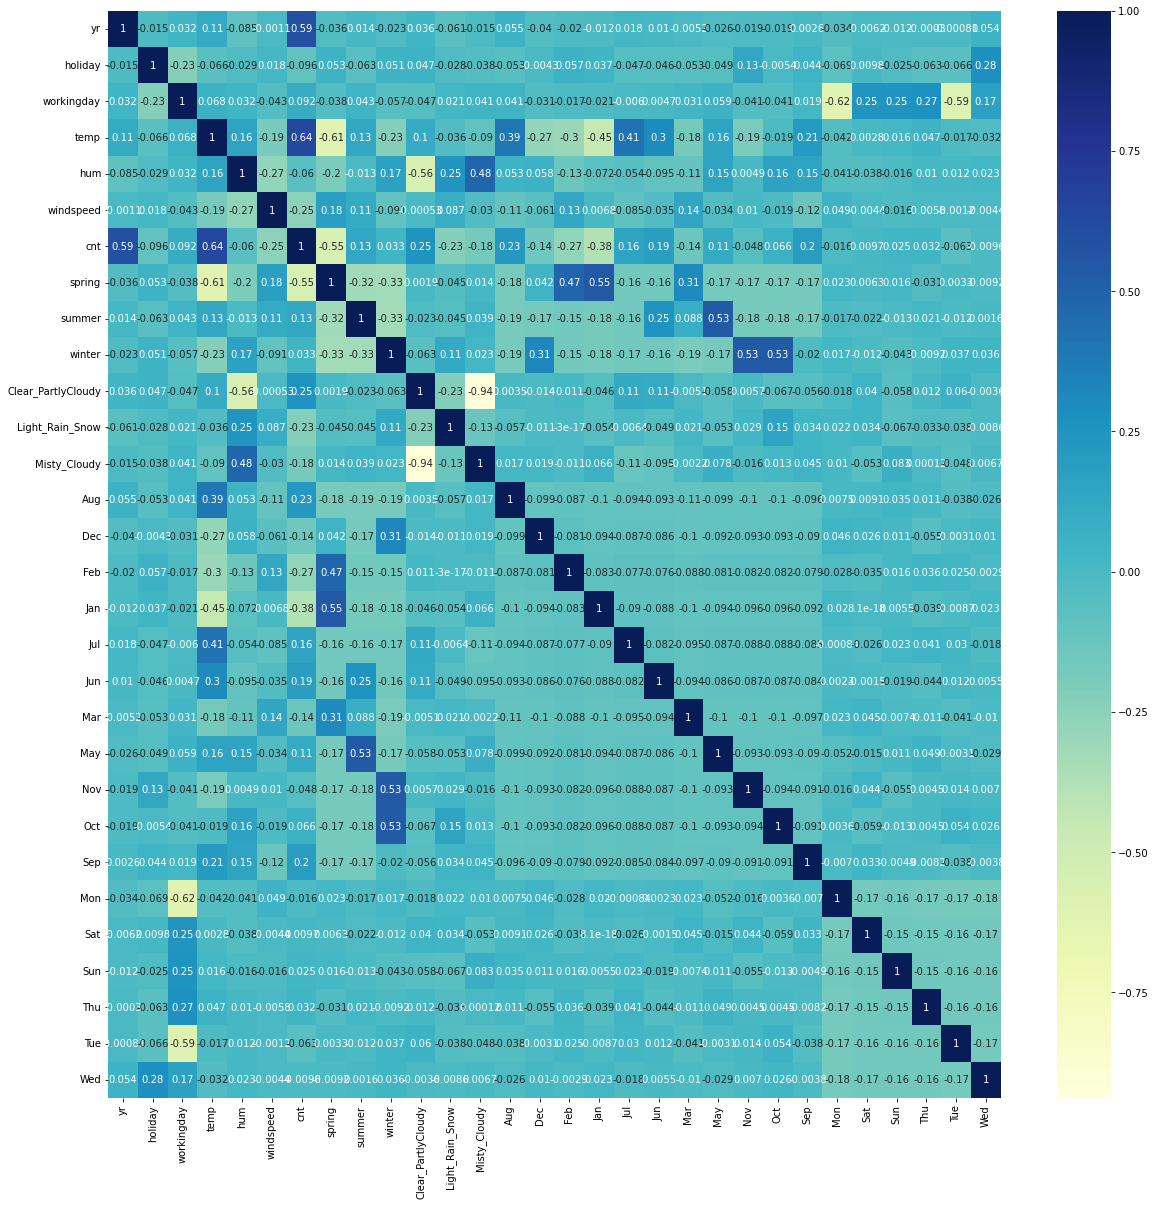

In [1063]:
corr = day_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

The values are not highly correlated. 

# Step 7: Training the model

## Dividing the training data into x_train and y_train

In [1064]:
# let us create `y_train` data with cnt variable. 
y_train = day_train.pop('cnt')

# After pop operation, `day_train` reduces to everything except the `cnt` column.
# We will use this as `x_train`
x_train = day_train

Let us look at the `x_train` and `y_train` data

In [1065]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [1066]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Clear_PartlyCloudy,Light_Rain_Snow,Misty_Cloudy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1067]:
x_train.shape

(510, 29)

## RFE

In [1068]:
# Running RFE with the 15 best features 
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [1069]:
# List all the features as per the selection in RFE
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Clear_PartlyCloudy', True, 1),
 ('Light_Rain_Snow', True, 1),
 ('Misty_Cloudy', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 3),
 ('Feb', False, 5),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 7),
 ('May', False, 10),
 ('Nov', False, 2),
 ('Oct', False, 6),
 ('Sep', False, 14),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', False, 13),
 ('Thu', False, 12),
 ('Tue', False, 8),
 ('Wed', False, 9)]

In [1070]:
# RFE supported columns
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Clear_PartlyCloudy', 'Light_Rain_Snow', 'Misty_Cloudy',
       'Aug', 'Jul', 'Jun', 'Mon'],
      dtype='object')

In [1071]:
# Columns not supported by RFE
x_train.columns[~rfe.support_]

Index(['summer', 'Dec', 'Feb', 'Jan', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [1072]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = x_train[x_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,winter,Clear_PartlyCloudy,Light_Rain_Snow,Misty_Cloudy,Aug,Jul,Jun,Mon
653,1,0,1,0.509887,0.575354,0.300794,0,1,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,1,0,0,0,1


In [1073]:
X_train_rfe.shape

(510, 15)

In [1074]:
# Build Model
def BuildModel(x, y):
    # Adding a constant variable 
    x = sm.add_constant(x)

    # Running the linear model
    lm = sm.OLS(y, x).fit()   

    #Let's see the summary of our linear model
    print(lm.summary())
    print(lm.params)
    return x


# Calculate the VIFs for the new model
def GetVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns # Name all the columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]    # Calculate VIF values for each feature
    vif['VIF'] = round(vif['VIF'], 2)   # Rounding off values to 2 decimals
    vif = vif.sort_values(by = "VIF", ascending = False)    # Sorting the features by decreasing VIF values
    return vif

##### To build a better model, we want:<br>
- ##### VIF < 5
- ##### p value < 0.05

#### Model 1

In [1075]:
x_train_new = BuildModel(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.34e-190
Time:                        00:48:25   Log-Likelihood:                 513.88
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     495   BIC:                            -934.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1380      0

In [1076]:
# Let us also check Variance Inflation factor for the model
GetVIF(x_train_new)

,Features,VIF
9,Clear_PartlyCloudy,inf
10,Light_Rain_Snow,inf
11,Misty_Cloudy,inf
4,temp,3.88
7,spring,2.55
5,hum,1.96
3,workingday,1.88
8,winter,1.81
15,Mon,1.78
13,Jul,1.64


#### Model 2

According to the data above, <br/>
We can see that `Clear_PartlyCloudy` has high VIF, let us drop it and build the model again.

In [1077]:
x_train_new.drop(['Clear_PartlyCloudy'],axis = 1, inplace = True)

In [1078]:
x_train_new = BuildModel(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.34e-190
Time:                        00:48:26   Log-Likelihood:                 513.88
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     495   BIC:                            -934.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2848      0.033     

In [1079]:
GetVIF(x_train_new)

,Features,VIF
0,const,67.58
4,temp,3.88
7,spring,2.55
5,hum,1.96
3,workingday,1.88
8,winter,1.81
14,Mon,1.78
12,Jul,1.64
10,Misty_Cloudy,1.57
11,Aug,1.56


#### Model 3

Let us remove `holiday` as it has a high p value and build the model again.

In [1080]:
x_train_new.drop(['holiday'],axis = 1, inplace = True)

In [1081]:
x_train_new = BuildModel(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.33e-190
Time:                        00:48:26   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2756      0.033     

In [1082]:
GetVIF(x_train_new)

,Features,VIF
0,const,66.51
3,temp,3.87
6,spring,2.55
4,hum,1.95
7,winter,1.81
2,workingday,1.65
11,Jul,1.64
13,Mon,1.64
9,Misty_Cloudy,1.57
10,Aug,1.55


Here we can see that 
1. VIF values of all variables except the const are less than 5.
2. p-values of all variables are less than 0.05 and hence are significant
3. F-statistic values is high (192.7) and hence overall model is significant

##### Equation of the line is

We can see that the equation of our best fitted line is:

$ cnt = 0.2756 +  0.2292 \times  yr + 0.0518  \times  workingday + 0.5683 \times temp - 0.1650 \times hum - 0.1880 \times windspeed - 0.1077 \times spring + 0.0479 \times winter - 0.2453 \times Light_Rain_Snow - 0.0562 \times Misty_Cloudy - 0.0662 \times Aug - 0.1279 \times Jul - 0.0559 \times Jun - 0.0644 \times Mon $


# Step 8: Model Validation

In [1083]:
lm = sm.OLS(y_train, x_train_new).fit()

## Linear Relationship
X and Y should have linear relationship.

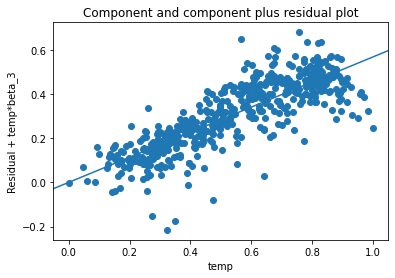

In [1084]:
sm.graphics.plot_ccpr(lm, 'temp')
plt.show()

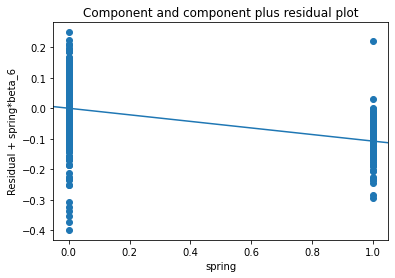

In [1085]:
sm.graphics.plot_ccpr(lm, 'spring')
plt.show()

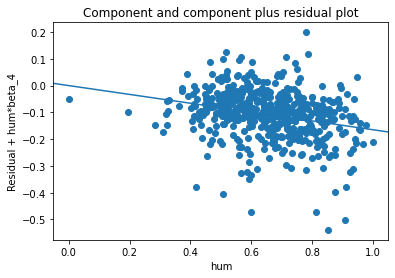

In [1086]:
sm.graphics.plot_ccpr(lm, 'hum')
plt.show()

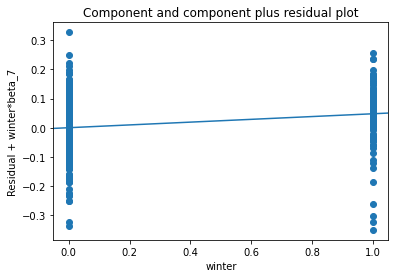

In [1087]:
sm.graphics.plot_ccpr(lm, 'winter')
plt.show()

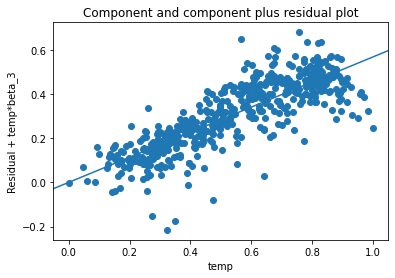

In [1088]:
sm.graphics.plot_ccpr(lm, 'temp')
plt.show()

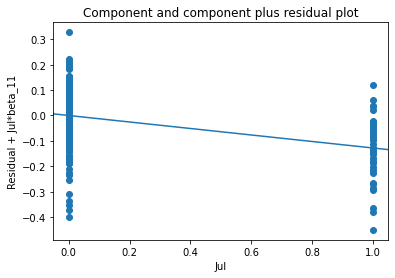

In [1089]:
sm.graphics.plot_ccpr(lm, 'Jul')
plt.show()

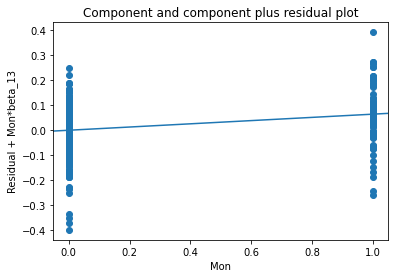

In [1090]:
sm.graphics.plot_ccpr(lm, 'Mon')
plt.show()

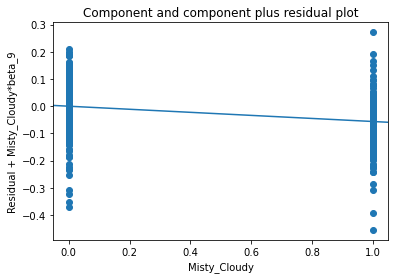

In [1091]:
sm.graphics.plot_ccpr(lm, 'Misty_Cloudy')
plt.show()

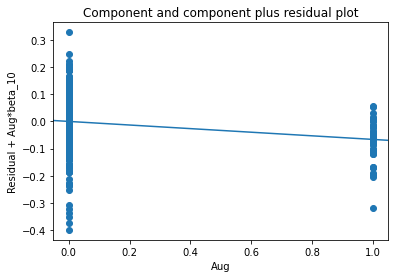

In [1092]:
sm.graphics.plot_ccpr(lm, 'Aug')
plt.show()

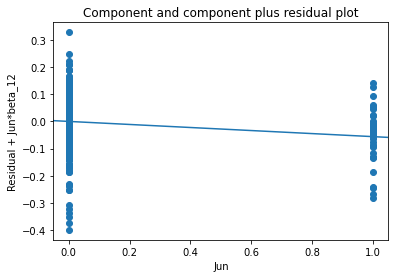

In [1093]:
sm.graphics.plot_ccpr(lm, 'Jun')
plt.show()

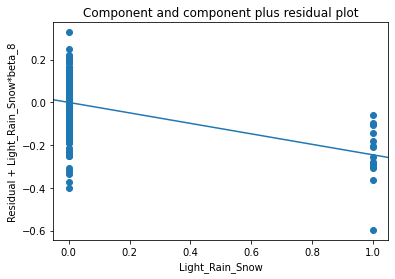

In [1094]:
sm.graphics.plot_ccpr(lm, 'Light_Rain_Snow')
plt.show()

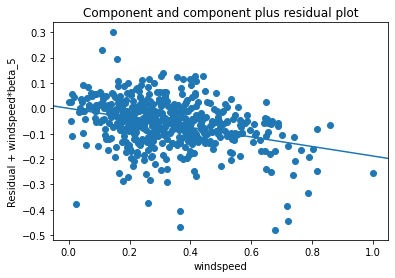

In [1095]:
sm.graphics.plot_ccpr(lm, 'windspeed')
plt.show()

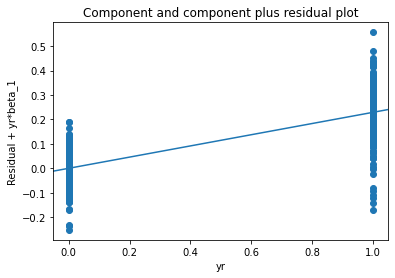

In [1096]:
sm.graphics.plot_ccpr(lm, 'yr')
plt.show()

We can see from the above plots, we can see that 

## Residual Analysis of the train data
The error terms must be normally distributed

In [1097]:
y_train_cnt = lm.predict(x_train_new)

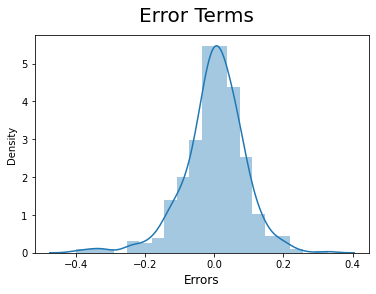

In [1098]:
fig = plt.figure() 
residual = y_train - y_train_cnt
sns.distplot(residual, bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 12)
plt.show()

From the above figure, we can see that errors are normally distributed

## Homoscedasticity
Error terms must have constant variance 

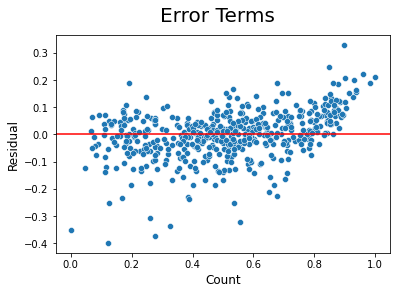

In [1099]:
plt.figure() 
residual = y_train - y_train_cnt
sns.scatterplot(y_train, residual)
plt.axhline(0, color = 'r')
plt.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Count", fontsize = 12)
plt.ylabel("Residual", fontsize = 12)
plt.show()

There are no perceptible pattern to the error terms. Hence, homoscedasticity is preserved.

## MultiColinearity
There must be no or little correlation among the variables

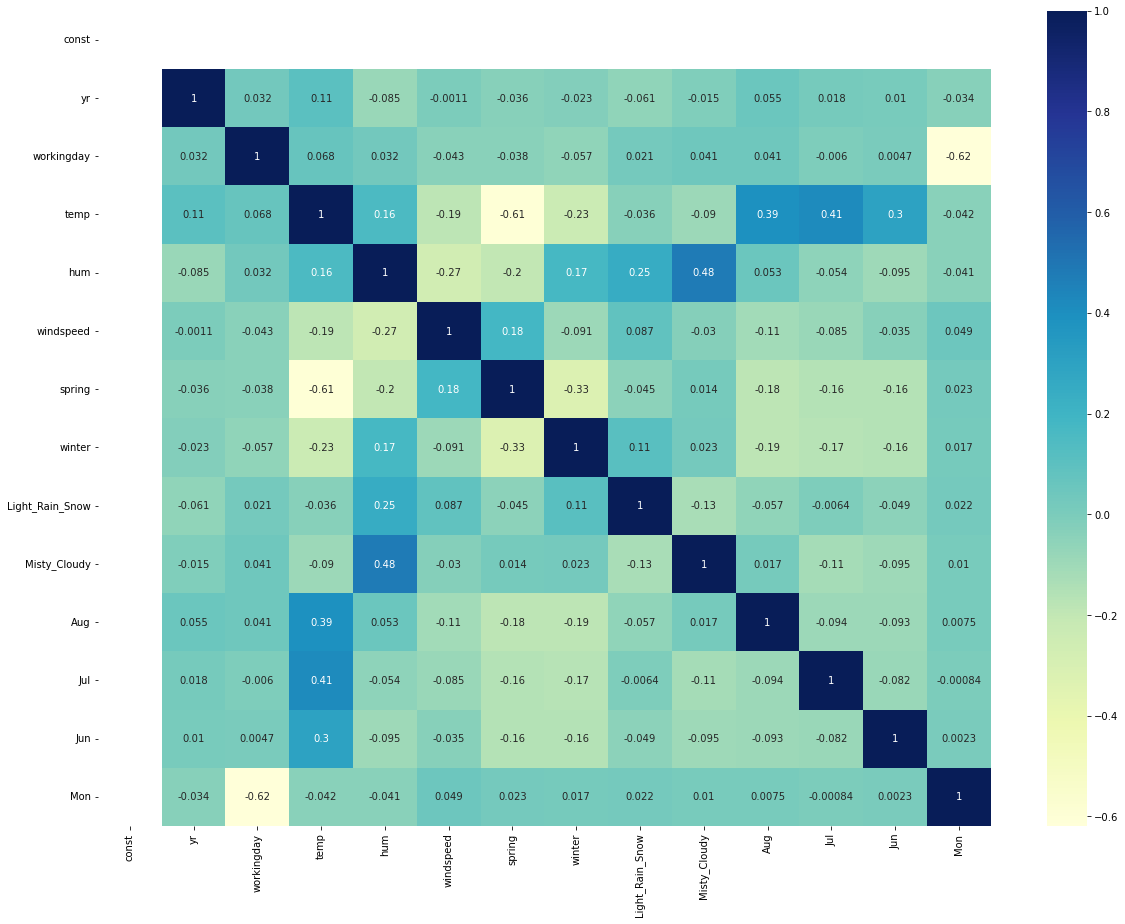

In [1100]:
plt.figure(figsize=(20,15))
sns.heatmap(x_train_new.corr(), annot=True, cmap="YlGnBu")
plt.show()

There is **very little correlation** between the predictors

# Step 9: Making Predictions

#### Applying the scaling on test sets

In [1101]:
vars = ["temp", "hum", "windspeed", "cnt"]
day_test[vars] = scaler.transform(day_test[vars])
day_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Clear_PartlyCloudy,Light_Rain_Snow,Misty_Cloudy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


Dividing into x_test and y_test

In [1102]:
y_test = day_test.pop("cnt")
x_test = day_test

Now let us use our model for predictions

In [1105]:
x_train_new.drop("const", axis=1, inplace=True)

In [1107]:
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

Making prediction

In [1108]:
y_pred = lm.predict(x_test_new)

# Step 10: Model Evaluation

Text(0, 0.5, 'y_pred')

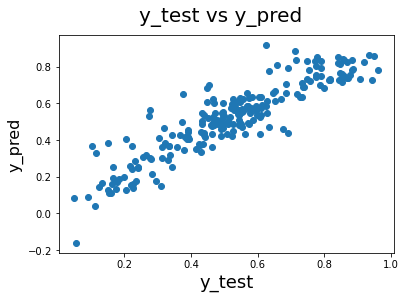

In [1109]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1118]:
#evaluate
r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.8182044312590558

r-squared for Train = 0.843<br>
r-squared for Test = 0.81820<br>
r-squared for test set is similar to train set, hence the model can do pretty well on test data based on what it has learnt from the train data.

In [1119]:
# Adjusted r-squared

# Total sample size
N = x_test_new.shape[0]
# No of independent variables
p = x_test_new.shape[1]

adjr2 = 1 - ( ((1-r2) * (N-1)) / (N-p-1))
adjr2

0.8057282647768342

Adjusted r-squared for Train = 0.839<br>
Adjusted r-squared for Test = 0.8057<br>
Adjusted r-squared for test set is similar to train set, hence the model can do pretty well on test data based on what it has learnt from the train data.

# Final Results

#### Metrics

1. r-squared for train data = **0.843**<br>
2. r-squared for test data = **0.81820**<br>
3. Adjusted r-squared for train data  = **0.839**<br>
4. Adjusted r-squared for test data = **0.8057**<br>
5. Equation of our best fitted line: **$ cnt = 0.2756 +  0.2292 \times  yr + 0.0518  \times  workingday + 0.5683 \times temp - 0.1650 \times hum - 0.1880 \times windspeed - 0.1077 \times spring + 0.0479 \times winter - 0.2453 \times Light\_Rain\_Snow - 0.0562 \times Misty\_Cloudy - 0.0662 \times Aug - 0.1279 \times Jul - 0.0559 \times Jun - 0.0644 \times Mon $**

#### Significant factors for bike rentals:

Following conclusions are made using the box plots that are plotted during the visualisation step and the equation of the best fitted line.

1. year : We can see that with every passing year, we have more rentals.
2. workingday: There are higher chances of renting a bike on workingdays
3. temp: More bikes are rented when temperature is higher
4. humidity: Rentals are more if the humidity is less
5. windspeed: Rentals drop with rise in windspeeds
6. season: Rentals are high when there is winter, but less when it is spring.
7. weather: There are high rentals when the weather is clear, but low when cloudy or has light rains/snow